In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal

def wiener_filter(data, template, p=False, lorentz=False, gamma=None):
    data_fft = np.fft.fft(data)
    template_fft = np.fft.fft(template)
    data_fft_freqs = np.fft.fftshift(np.fft.fftfreq(data.size))
    template_fft_freqs = np.fft.fftshift(np.fft.fftfreq(template.size))
    if p:
        print("data_fft length: " + str(len(data_fft)))
        print("data_fft: " + str(data_fft) + "\n")
        timeseries_plot(data_fft, data_fft_freqs)
        print("template_fft length: " + str(len(template_fft)))
        print("template_fft: " + str(template_fft) + "\n")
        timeseries_plot(template_fft, template_fft_freqs)
    
    if lorentz and gamma is not None:
        data_fft = lorentzify(data_fft, 0, gamma, 1/np.pi)
        template_fft = lorentzify(template_fft, 0, gamma, 1/np.pi)
        if p:
            print("data_fft_lorentz: " + str(data_fft) + "\n")
            timeseries_plot(data_fft, data_fft_freqs)
            print("template_fft_lorentz: " + str(template_fft) + "\n")
            timeseries_plot(template_fft, template_fft_freqs)

    w_filter = np.abs(np.fft.fft(data_fft * template_fft))
    if p:
        print("w_filter length: " + str(len(w_filter)))
        print("w_filter: " + str(w_filter))
        
    return w_filter

def lorentzify(freqs, center_freqs, gamma, a):
    return a * 0.5 * gamma**2 / (0.5 * gamma**2 + (freqs - center_freqs)**2)

def lorentzian(x, center_freq, gamma, a):
    return a * 0.5 * gamma**2 / (0.5 * gamma**2 + (x - center_freq)**2)

def lorentzify_2(signal, gamma):
    signal_fft = np.fft.fft(signal)
    signal_fft_freqs = np.fft.fftshift(np.fft.fftfreq(signal.size))
    print("pre lorentz: ")
    timeseries_plot(signal_fft, signal_fft_freqs)
    signal_fft = signal_fft * lorentzian(signal_fft_freqs, 0, gamma, 1/np.pi)
    print("lorentzified: ")
    timeseries_plot(signal_fft, signal_fft_freqs)
    return np.fft.ifft(signal_fft)

def timeseries_plot(data, freq=None):
    timesteps = np.arange(len(data))
    if freq is not None:
        timesteps = freq
    plt.plot(timesteps, data)
    plt.show()

Alpha test:

In [ ]:
# Init params
start_time = 10000
sample_freq = 50
alpha_one = 0.06
alpha_two = 0.12
alpha_three = 0.18
amplitude = 1

# Generate signals
t = np.arange(0, 1000, 1 / sample_freq)
signal_one = amplitude * np.sin(alpha_one * np.square(t))
signal_two = amplitude * np.sin(alpha_two * np.square(t))
signal_three = amplitude * np.sin(alpha_three * np.square(t))

# Generate white noise
noise_length = len(signal_one) + start_time
rng = np.random.default_rng()
white_noise = rng.standard_normal(noise_length)

# Inject the signal
left_noise = white_noise[:start_time]
left_zeros = np.zeros(len(left_noise))
extended_sig_one = np.concatenate((left_zeros, signal_one), axis=None)
extended_sig_two = np.concatenate((left_zeros, signal_two), axis=None)
extended_sig_three = np.concatenate((left_zeros, signal_three), axis=None)
sig_noise_one = white_noise + extended_sig_one
sig_noise_two = white_noise + extended_sig_two
sig_noise_three = white_noise + extended_sig_three

# Spectrogram the signal
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(sig_noise_one, Fs=sample_freq)
plt.xlabel('Time')
plt.ylabel('Frequency')
print("alpha = 0.06: ")
plt.show()
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(sig_noise_two, Fs=sample_freq)
plt.xlabel('Time')
plt.ylabel('Frequency')
print("alpha = 0.12: ")
plt.show()
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(sig_noise_three, Fs=sample_freq)
plt.xlabel('Time')
plt.ylabel('Frequency')
print("alpha = 0.18: ")
plt.show()

Sample frequency test:

In [ ]:
# Init params
start_time = 10000
sample_freq_hi = 100
sample_freq_lo = 50
alpha = 0.15
amplitude = 1

# Generate a signal (higher sample frequency)
t_hi = np.arange(0, 1000, 1 / sample_freq_hi)
signal_hi = amplitude * np.sin(alpha * np.square(t_hi))

# Generate a signal (lower sample frequency)
t_lo = np.arange(0, 1000, 1 / sample_freq_lo)
signal_lo = amplitude * np.sin(alpha * np.square(t_lo))

# Generate white noise + signal injection
noise_length_hi = len(signal_hi) + start_time
noise_length_lo = len(signal_lo) + start_time
rng = np.random.default_rng()
white_noise_hi = rng.standard_normal(noise_length_hi)
white_noise_lo = rng.standard_normal(noise_length_lo)
left_noise_hi = white_noise_hi[:start_time]
left_zeros_hi = np.zeros(len(left_noise_hi))
left_noise_lo = white_noise_lo[:start_time]
left_zeros_lo = np.zeros(len(left_noise_lo))
extended_sig_hi = np.concatenate((left_zeros_hi, signal_hi), axis=None)
extended_sig_lo = np.concatenate((left_zeros_lo, signal_lo), axis=None)
sig_noise_hi = white_noise_hi + extended_sig_hi
sig_noise_lo = white_noise_lo + extended_sig_lo

# Spectrogram the signal
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(sig_noise_hi, Fs=sample_freq_hi)
plt.xlabel('Time')
plt.ylabel('Frequency')
print("sample rate 100, alpha = 0.15: ")
plt.show()
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(sig_noise_lo, Fs=sample_freq_lo)
plt.xlabel('Time')
plt.ylabel('Frequency')
print("sample rate 50, alpha = 0.15: ")
plt.show()   

Lorentzian:

white noise plot: 


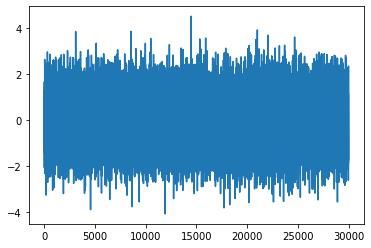

signal plot: 


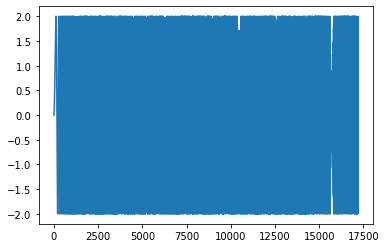

white noise + injected signal plot: 


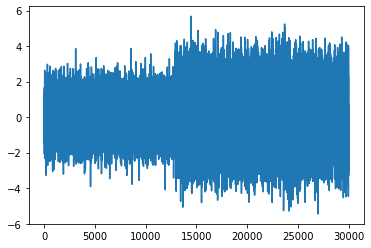

pre lorentz: 


/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


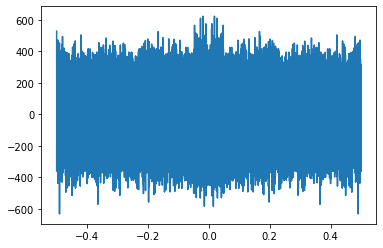

lorentzified: 


/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


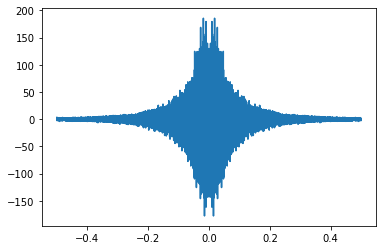

lorentz_noise plot: 


/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


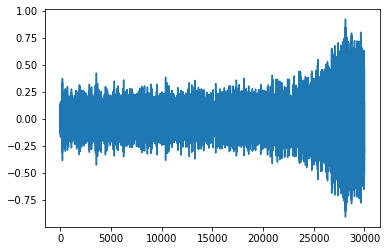

matplotlib.spectrogram plot (white noise + signal): 


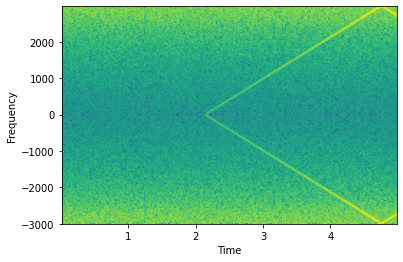

scipy.spectrogram plot (white noise + signal): 


/home/shauncl8/.local/lib/python3.9/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


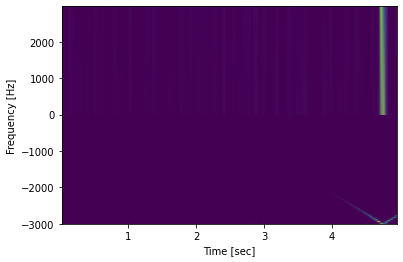

template plot (alpha1): 


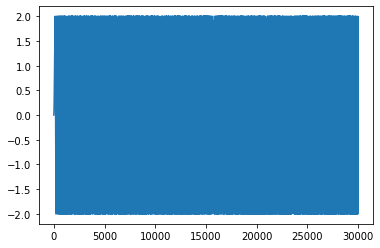

pre lorentz: 


/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


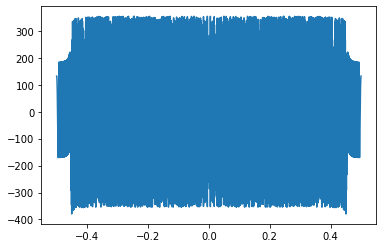

lorentzified: 


/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


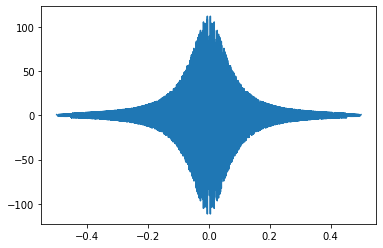

lorentz_template plot: 


/home/shauncl8/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


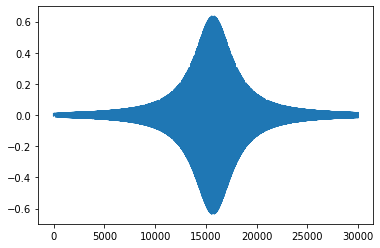

filter plot (template alpha = 0.00010):


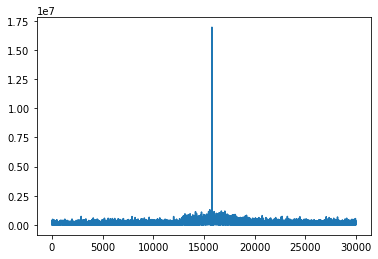

In [28]:
# Generate white noise
noise_length = 30000
rng = np.random.default_rng()
white_noise = rng.standard_normal(noise_length)
print("white noise plot: ")
timeseries_plot(white_noise)

# Generate a signal
start_time = 12800
sig_length = noise_length - start_time
sig_timesteps = np.arange(sig_length)
alpha = 0.0001
amplitude = 2
signal = amplitude * np.sin(alpha * np.square(sig_timesteps))
print("signal plot: ")
timeseries_plot(signal)
# signal_lorentz = lorentzify_2(signal, 10)
# print("signal_lorentz plot: ")
# timeseries_plot(signal_lorentz)

# Inject the signal
left_noise = white_noise[:start_time]
left_zeros = np.zeros(len(left_noise))
extended_sig = np.concatenate((left_zeros, signal), axis=None)
sig_noise = white_noise + extended_sig
print("white noise + injected signal plot: ")
timeseries_plot(sig_noise)
lorentz_noise = lorentzify_2(sig_noise, 0.1)
print("lorentz_noise plot: ")
timeseries_plot(lorentz_noise)

# Spectrogram the signal
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(lorentz_noise, Fs=6000)
plt.xlabel('Time')
plt.ylabel('Frequency')
print("matplotlib.spectrogram plot (white noise + signal): ")
plt.show()   
fs = 6000
f, t, Sxx = scipy.signal.spectrogram(lorentz_noise, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
print("scipy.spectrogram plot (white noise + signal): ")
plt.show()

# Generate a signal template
template_length = noise_length
template_timesteps = np.arange(template_length)
alpha1 = 0.00010
amplitude = 2
template1 = amplitude * np.sin(alpha1 * np.square(template_timesteps))
print("template plot (alpha1): ")
timeseries_plot(template1)
lorentz_template = lorentzify_2(template1, 0.1)
print("lorentz_template plot: ")
timeseries_plot(lorentz_template)


filtered1 = wiener_filter(lorentz_noise, lorentz_template)
print("filter plot (template alpha = 0.00010):")
timeseries_plot(filtered1)

In [ ]:
# Init params
start_time = 0
sample_freq = 50
alpha = 0.0001
amplitude = 1

# Generate signals
t = np.arange(0, 1000, 1 / sample_freq)
signal = amplitude * np.sin(alpha * np.square(t))
timeseries_plot(signal)

# Lorentzian lineshape
linewidth = 0.000001
decay_rate = 0.000001
weighting_function = np.exp(-np.pi * linewidth * t) * np.exp(-decay_rate * np.square(t))
timeseries_plot(weighting_function)
signal_lorentz = weighting_function * signal
timeseries_plot(signal_lorentz)

# Generate white noise
noise_length = len(signal) + start_time
rng = np.random.default_rng()
white_noise = rng.standard_normal(noise_length)

# Inject the signal
left_noise = white_noise[:start_time]
left_zeros = np.zeros(len(left_noise))
extended_sig = np.concatenate((left_zeros, signal), axis=None)
sig_noise_lorentz = (white_noise + extended_sig) * weighting_function
timeseries_plot(sig_noise_lorentz)

# Spectrogram the signal
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(sig_noise_lorentz, Fs=sample_freq)
plt.xlabel('Time')
plt.ylabel('Frequency')
print("alpha = 0.06: ")
plt.show()